# **Problem Statement**
### Perform clustering (Hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters

**Clustering techniques**


1.   Hierarchical
2.   K-Means
3.   DBSCAN

Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.

It comprises of many different methods based on different distance measures. E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance), etc.

Centrally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method.


**Case Summary**

East-West Airlines aims to better understand its customers by analyzing their
flying patterns, frequent flyer rewards usage, and airline credit card usage. The dataset (EastWestAirlines.xls) includes information on 4000 passengers in the airline's frequent flyer program, detailing their mileage history and how they accrued or spent miles in the last year. The objective is to identify clusters of passengers with similar characteristics to target different segments with tailored mileage offers.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sns.set()
from sklearn.metrics import silhouette_score as sil
#

In [ ]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data= pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data.set_index('ID',inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [ ]:
print('unique_cc1',data.cc1_miles.unique())
print('unique_cc2',data.cc2_miles.unique())
print('unique_cc3',data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [ ]:
data.isnull().sum().sum()

0

###**Duplicated Values**

**print the duplicated rows**

In [ ]:
data.duplicated().sum().sum()
#gives one dulplicate row

1

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(3998, 11)

In [ ]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,


### **Exploratory Data Analysis**

**histogram**

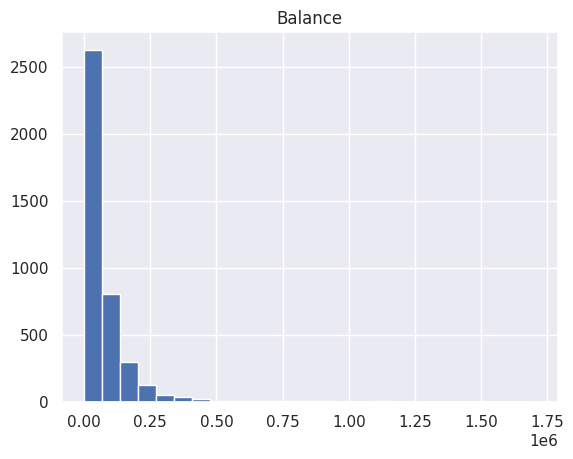

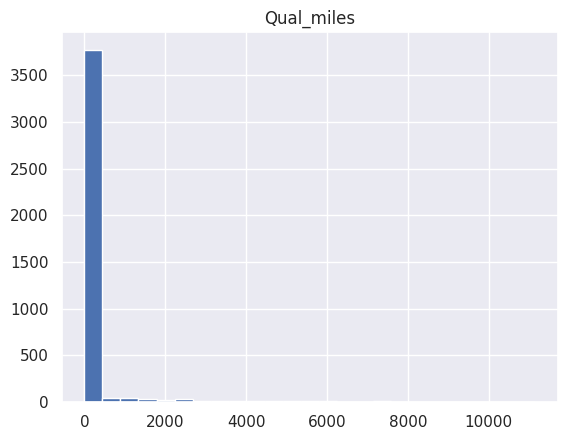

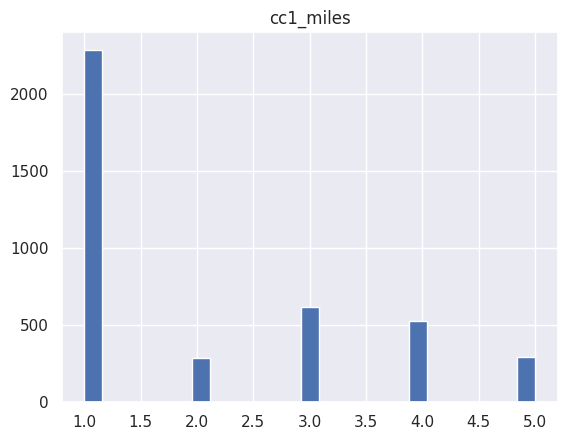

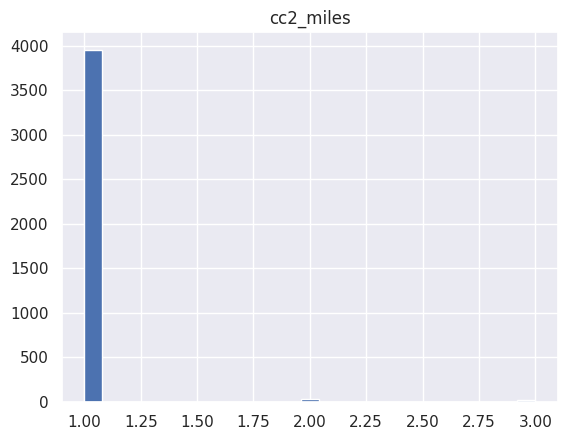

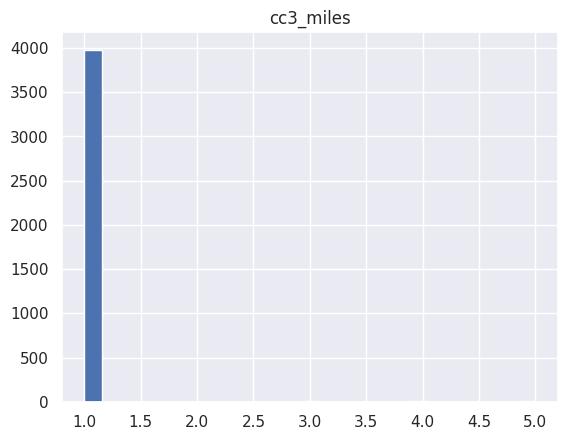

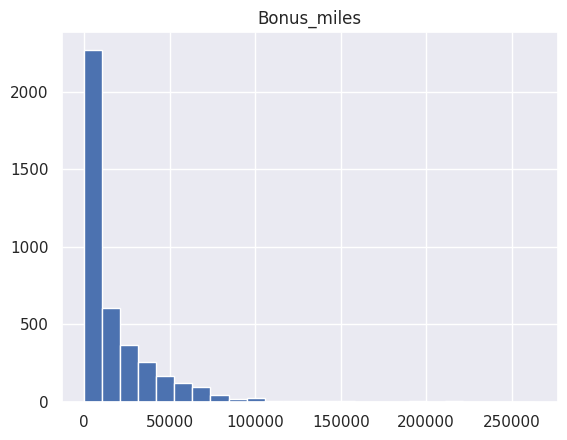

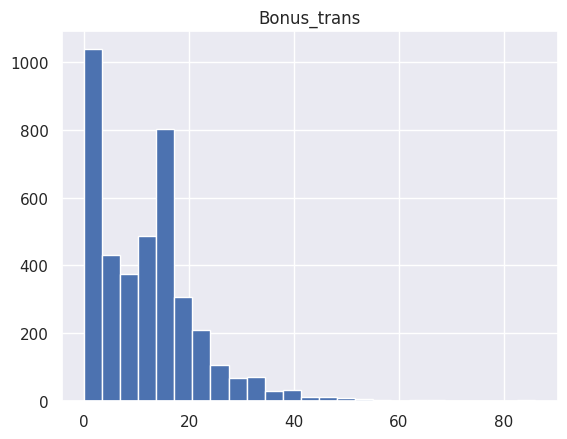

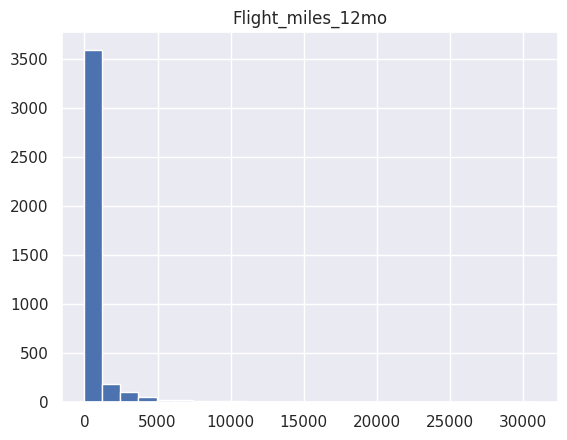

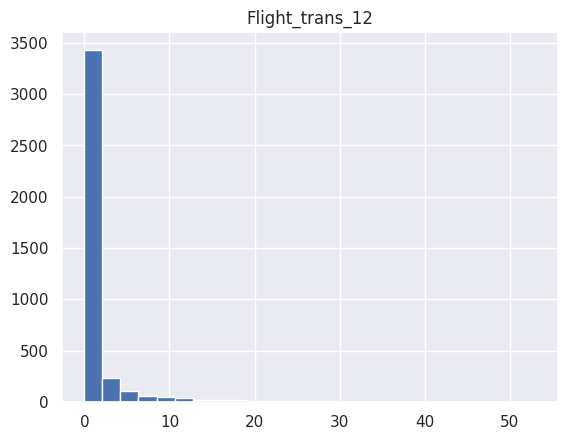

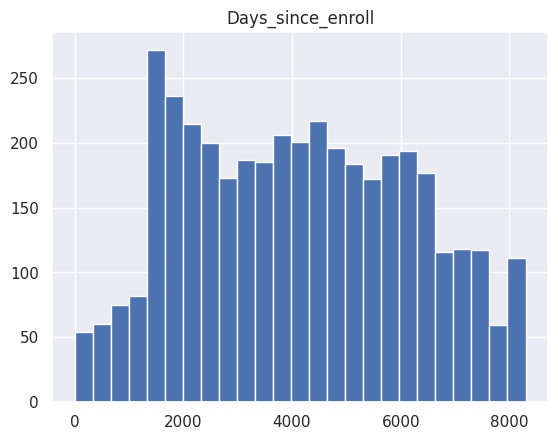

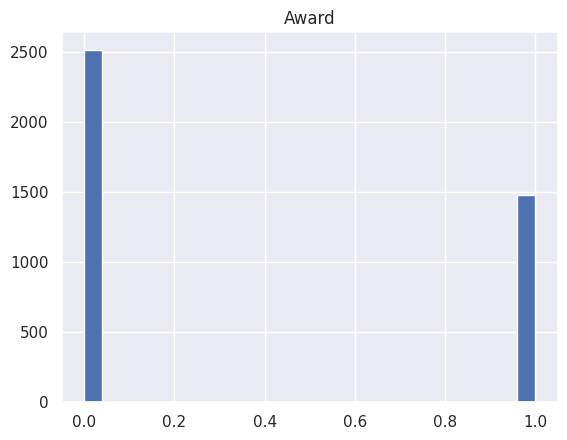

In [ ]:
for i in data.columns:
  plt.hist(data[i],bins=25)
  plt.title(i)
  plt.show()

Balance


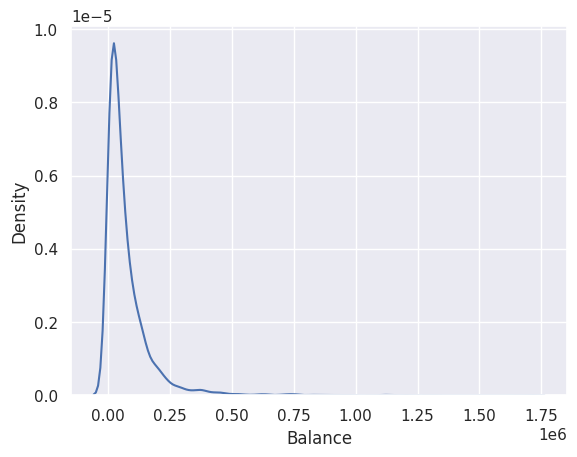

Qual_miles


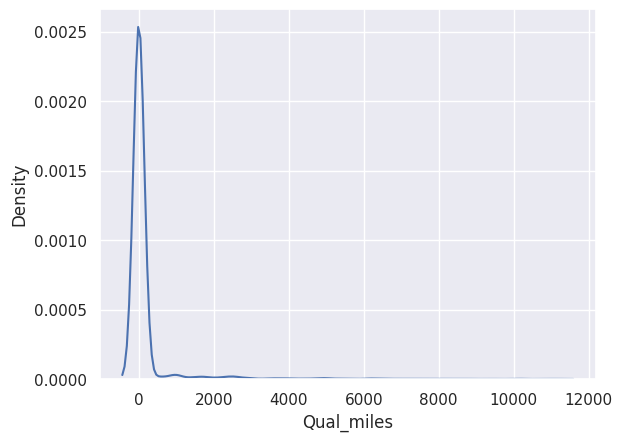

cc1_miles


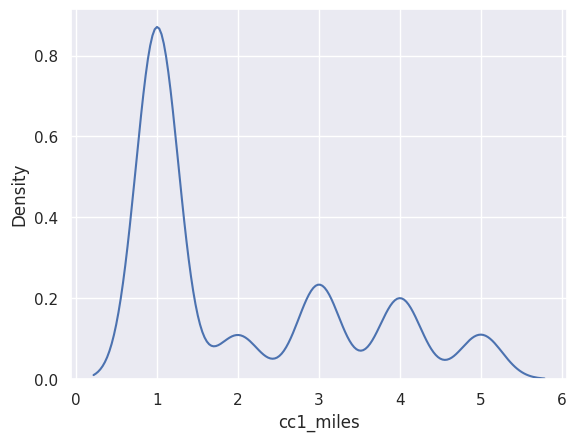

cc2_miles


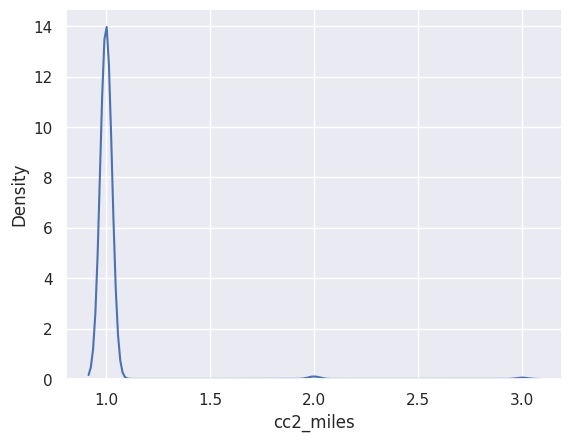

cc3_miles


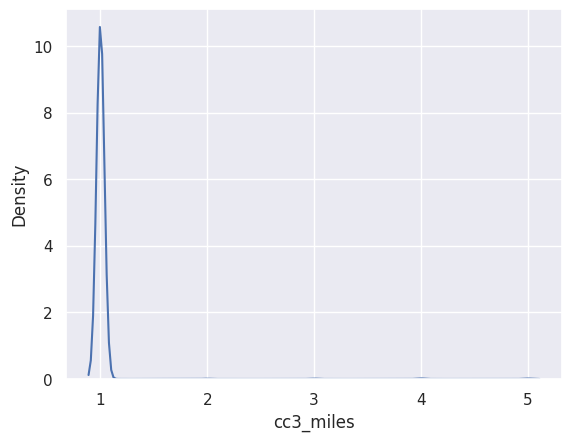

Bonus_miles


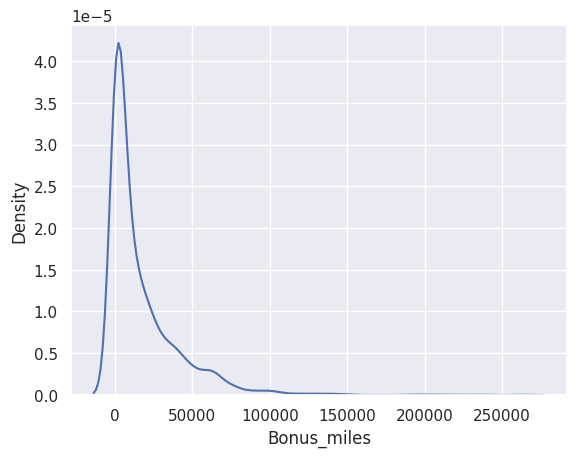

Bonus_trans


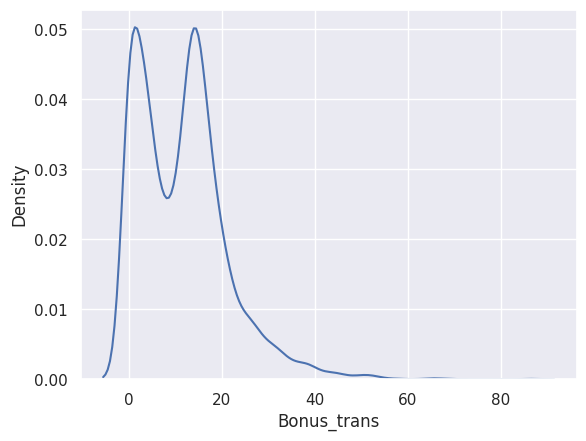

Flight_miles_12mo


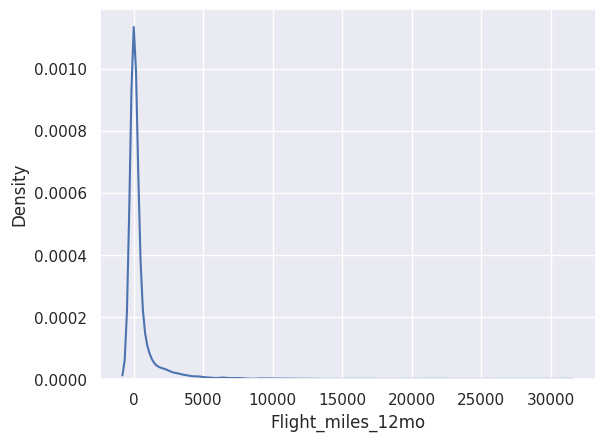

Flight_trans_12


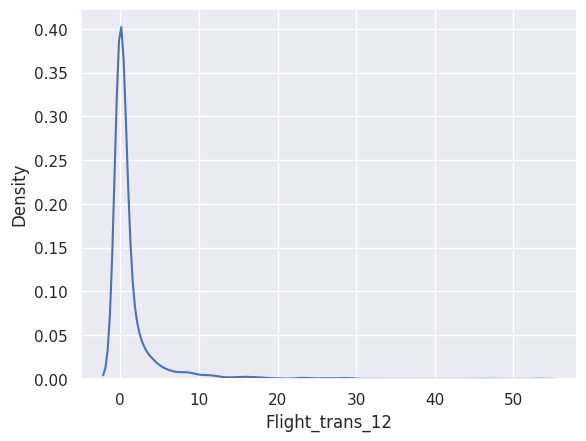

Days_since_enroll


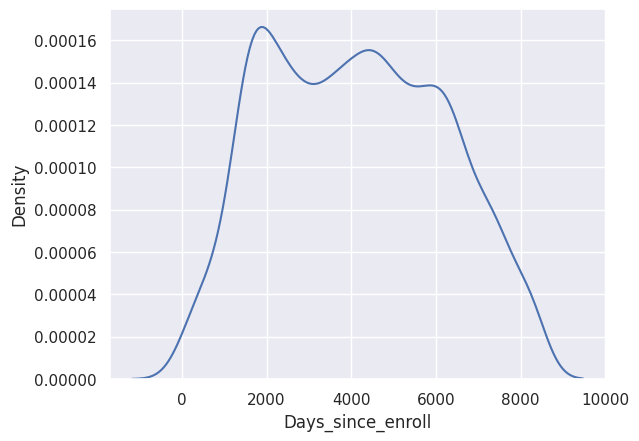

Award


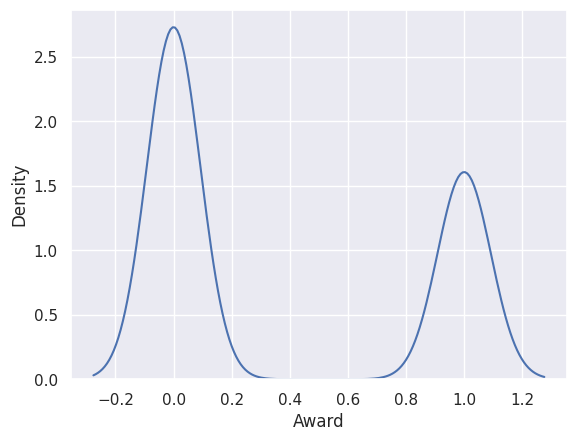

In [ ]:
# Kernel Density for every feature, singled out

for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

### **Outliers detector**

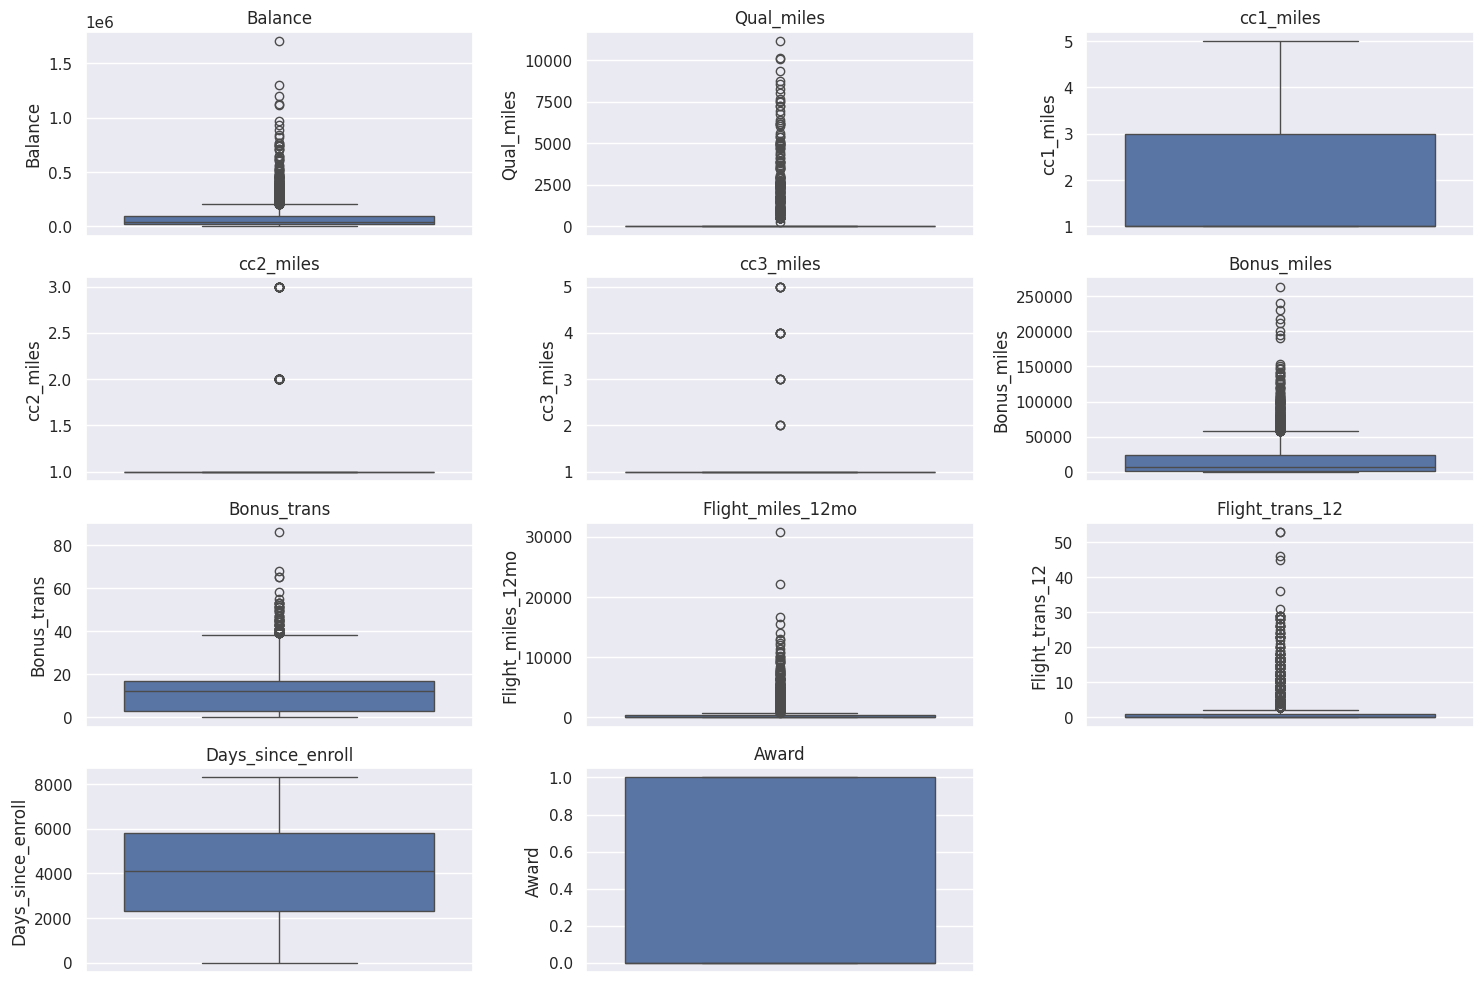

In [ ]:
n_cols = 3

# Create a figure and axis for every column in the data
fig, axes = plt.subplots(len(data.columns) // n_cols + 1, n_cols, figsize=(15, 10))
#plt.subplots(12 // 4, 3, figsize=(15, 10))

# Flatten the axes array
axes = axes.flatten()
#flatten() -> function is used to convert a multi-dimensional array (like a 2D array of subplots) into a 1D array
# Plot each boxplot in the corresponding axis
for i, col in enumerate(data.columns):
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any extra subplots that are not used
for i in range(len(data.columns), len(axes)):
    fig.delaxes(axes[i])
# Adjust layout
plt.tight_layout()
plt.show()

<Axes: >

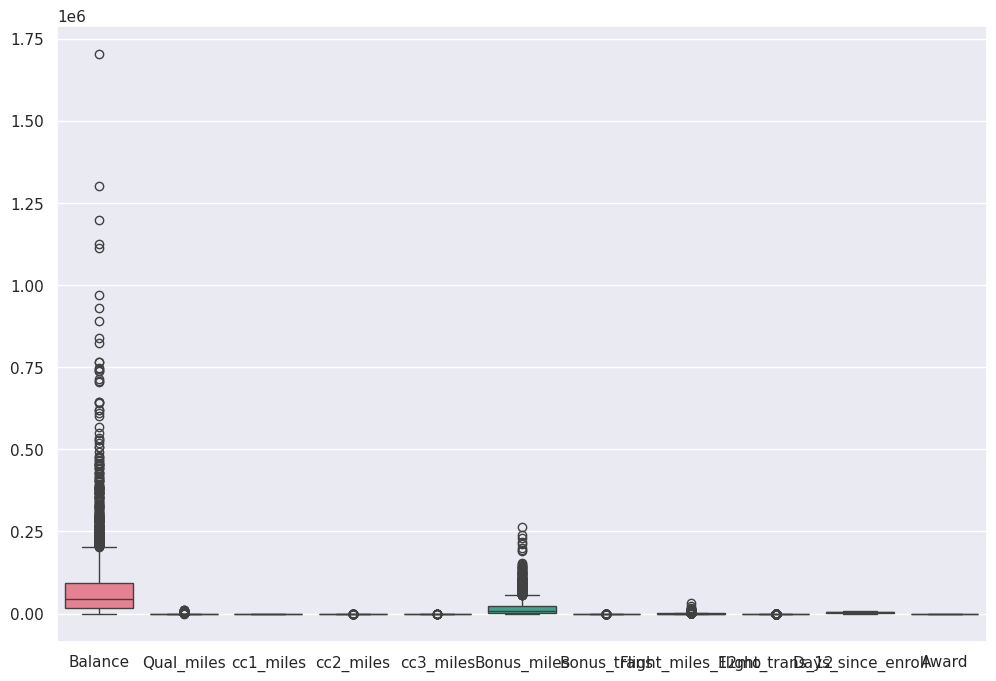

In [ ]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=data)

### **Data Visualization**

In [ ]:
countNotermdeposit = len(data[data.Award == 0])
counthavetermdeposit = len(data[data.Award == 1])
print(countNotermdeposit)
print(counthavetermdeposit)
#percantage a = (a)/(a+b)*100

2517
1481


In [ ]:
print('percantage_of_countNotermdeposit:', (countNotermdeposit)/(countNotermdeposit+counthavetermdeposit)*100)
print('percantage_of_counthavetermdeposit:', (counthavetermdeposit)/(countNotermdeposit+counthavetermdeposit)*100)


percantage_of_countNotermdeposit: 62.95647823911956
percantage_of_counthavetermdeposit: 37.04352176088044


Text(0.5, 1.0, 'Whether the client has a Award or not ')

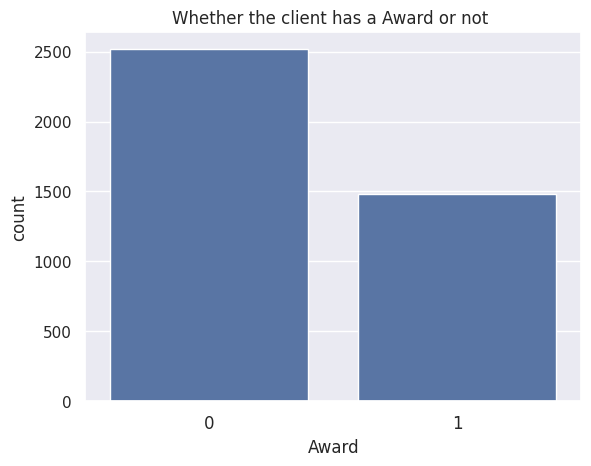

In [ ]:
sns.countplot(x='Award', data=data,
              order=data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

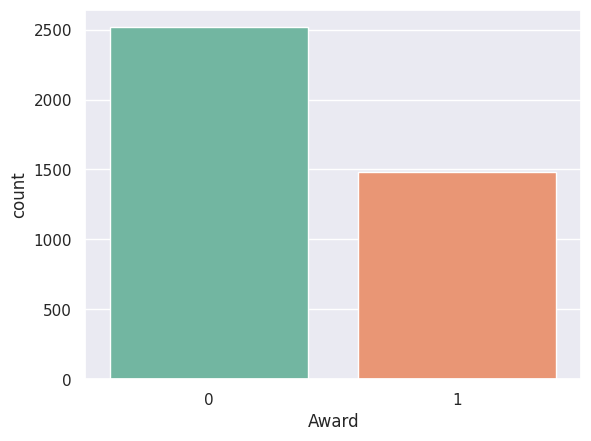

In [ ]:
#data['Award'].value_counts().plot(kind='bar')
sns.countplot(x='Award', data=data, palette='Set2')

plt.show()

In [ ]:
data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


In [ ]:
matrix_corr = data.corr()
matrix_corr['Balance'].sort_values(ascending=False)

,Balance
Balance,1.000000
Bonus_miles,0.403410
cc1_miles,0.338252
Bonus_trans,0.324797
Days_since_enroll,0.262975
Flight_trans_12,0.255656
Flight_miles_12mo,0.217509
Award,0.178380
Qual_miles,0.108696
cc3_miles,0.035234


<Figure size 1200x800 with 0 Axes>

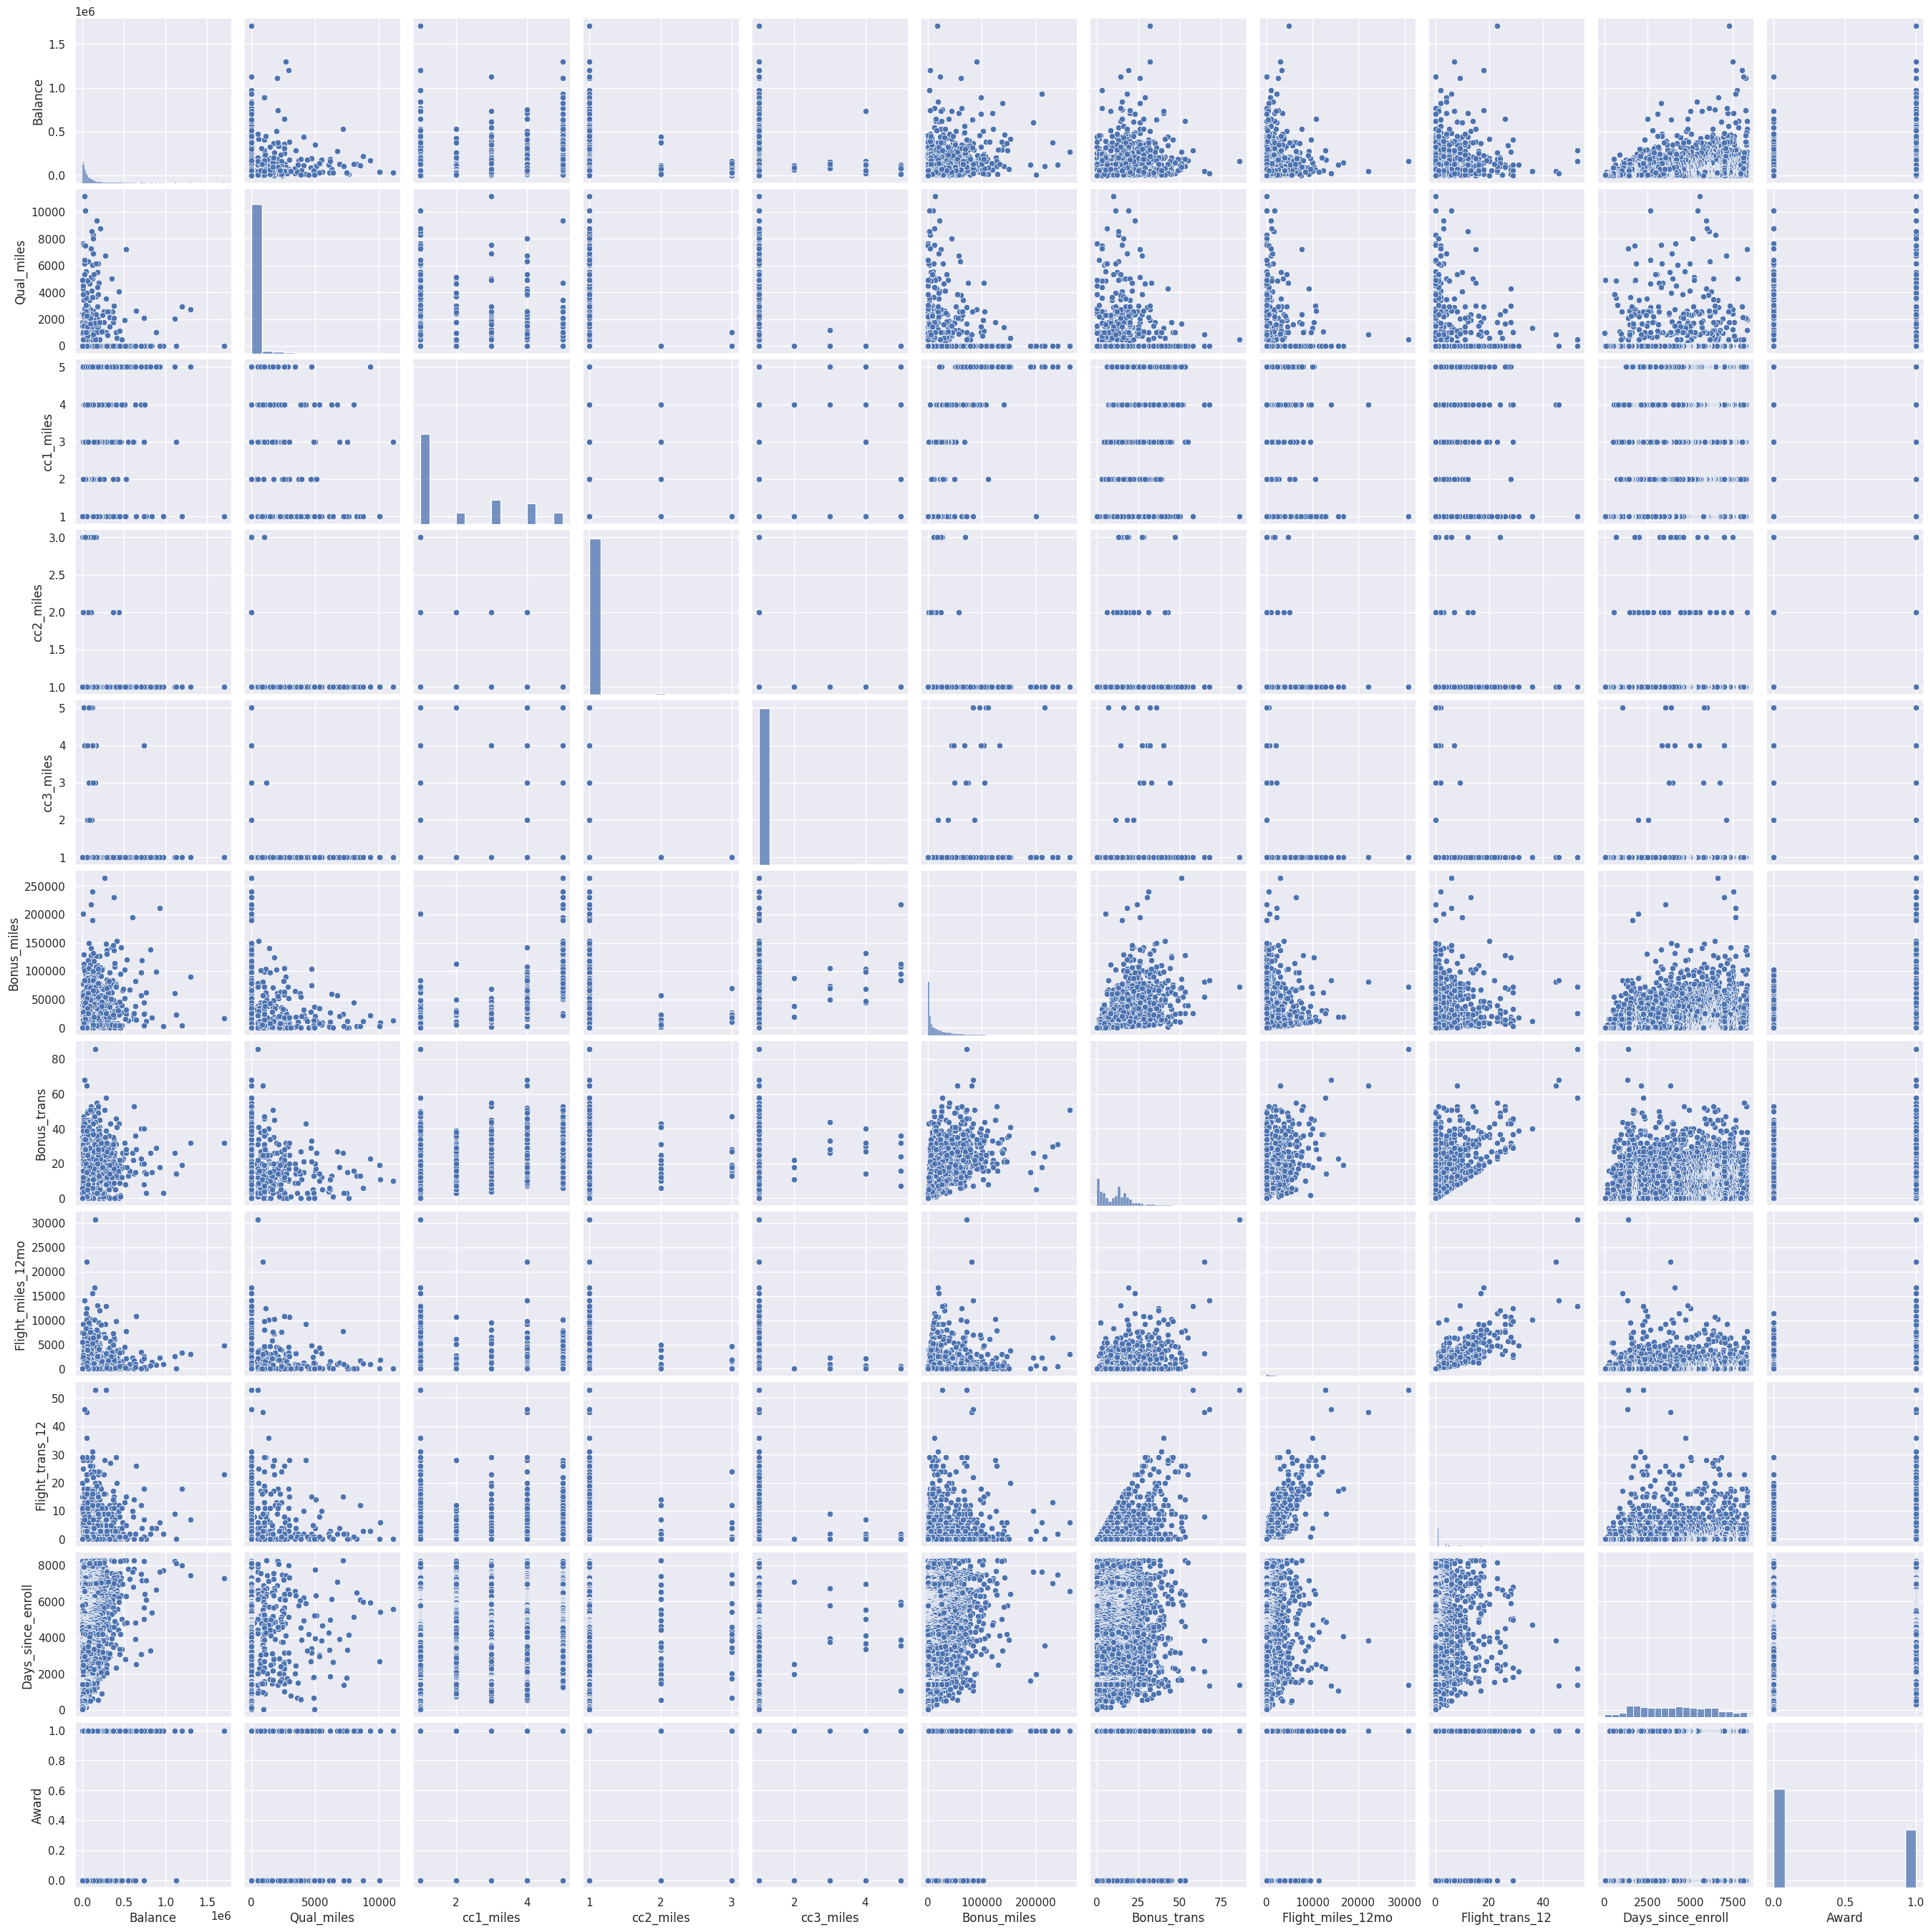

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(data)

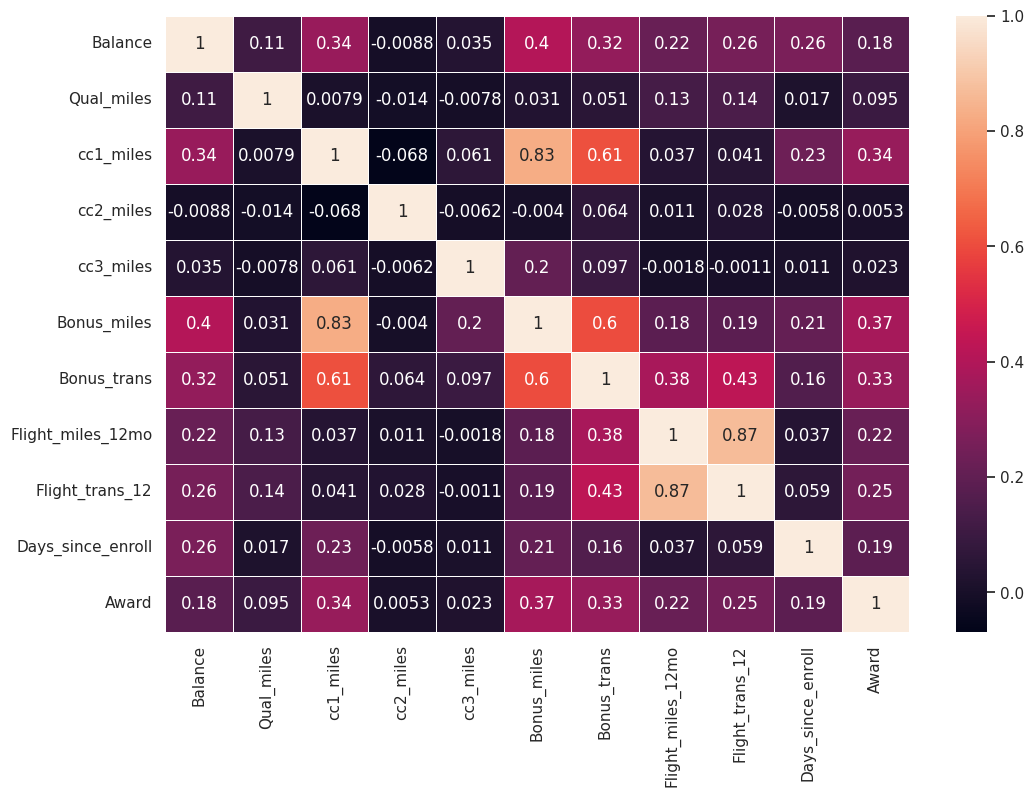

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True,linewidths= .5)
plt.show()

# Implementing Clustering Algorithms:

### **hierarchical clustering**

**Hierarchical Clustering Algorithm**


**What is Hierarchical Clustering?**
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.One of the major considerations in using the K-means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction.The output of the hierarchical clustering algorithm is quite different from the K-mean algorithm as well. It results in an inverted tree-shaped structure, called the dendrogram.

**Types Of Hierarchical Clustering:**
There are two types of hierarchical clustering:
Agglomerative: The data points are clustered using a bottom-up approach starting with individual data points.
Divisive: The top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.



linkage{“ward”, “complete”, “average”, “single”}, default=”ward” Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

ward minimizes the variance of the clusters being merged.

average uses the average of the distances of each observation of the two sets.

complete or maximum linkage uses the maximum distances between all observations of the two sets.

single uses the minimum of the distances between all observations of the two sets.

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#

In [ ]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
def norm_fun(i):
  x = (i-i.min())/(i.max()-i.min())
  return(x)

In [ ]:
data_norm = norm_fun(data)
data_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0


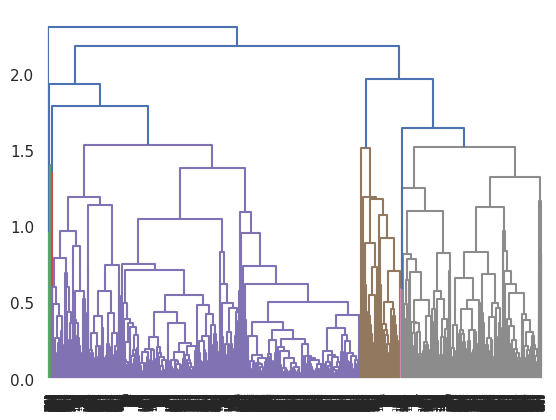

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='complete'))

**Dendrogram on Standard Scaler Applied on Data**

In [ ]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(data_norm)
        silhouette_score1 = sil(data_norm, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535888544052936
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535888544052936

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4354523188194701
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318364582439801
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3961439228235289
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351186081149816

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42489181550394106
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4645451427805366
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5285595526639542
For n_

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='complete')
hc


AgglomerativeClustering(linkage='complete', n_clusters=6)

In [ ]:
# save clusters for chart
y_hc = hc.fit_predict(data_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])


In [ ]:
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,1
...,...
3993,0
3994,0
3995,0
3996,2


In [ ]:
Clusters['Clusters'].value_counts()

,count
Clusters,
2,2490
0,1144
1,325
4,31
5,4
3,4


In [ ]:
data_norm['Clusters_id'] = hc.labels_


In [ ]:
data_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters_id
ID,,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,2
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,2
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,2
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,2
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0


### **K-Means**

Let's break down and explain the code you've provided:

### Code Overview
```python
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is the DataFrame created earlier
model1 = KMeans(n_clusters=5).fit(df)
df.plot(x="X", y="Y", c=model1.labels_, kind="scatter", s=50, cmap=plt.cm.coolwarm_r)
```

### Step-by-Step Explanation

1. **KMeans Clustering:**
   ```python
   model1 = KMeans(n_clusters=5).fit(df)
   ```
   - **`KMeans(n_clusters=5)`:** This initializes a KMeans clustering model from the `sklearn.cluster` module, specifying that you want to create 5 clusters (`n_clusters=5`).
   - **`.fit(df)`:** This fits the KMeans model to the DataFrame `df`. The algorithm tries to partition the data points into 5 clusters based on their proximity in the `X` and `Y` dimensions.
   - **`model1.labels_`:** After fitting, `model1.labels_` contains the cluster labels for each data point, indicating which of the 5 clusters each point belongs to.

2. **Plotting the Clusters:**
   ```python
   df.plot(x="X", y="Y", c=model1.labels_, kind="scatter", s=50, cmap=plt.cm.coolwarm_r)
   ```
   - **`df.plot(...)`:** This is using pandas' built-in plotting functionality to create a scatter plot.
   - **`x="X", y="Y"`:** Specifies that the `X` and `Y` columns of the DataFrame should be used for the x and y coordinates of the plot, respectively.
   - **`c=model1.labels_`:** This sets the color of each point in the scatter plot based on the cluster label assigned by the KMeans model. Points that belong to the same cluster will have the same color.
   - **`kind="scatter"`:** This specifies that the plot should be a scatter plot.
   - **`s=50`:** Sets the size of the points in the scatter plot to 50. You can adjust this value to make the points larger or smaller.
   - **`cmap=plt.cm.coolwarm_r`:** This sets the colormap used to differentiate the clusters. `plt.cm.coolwarm_r` is a reversed "coolwarm" colormap, which goes from cool colors (like blue) to warm colors (like red). Each cluster will have a different color.

### Summary
This code fits a KMeans clustering model to the DataFrame `df` with 5 clusters and then visualizes the clusters in a scatter plot. Each point represents a data entry from `df`, positioned based on its `X` and `Y` values. The color of each point indicates which of the 5 clusters it belongs to, providing a visual way to understand the clustering of the data.

In [ ]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
def norm_fun(i):
  x = (i-i.min())/(i.max()-i.min())
  return(x)

In [ ]:
norm_data = norm_fun(data)
norm_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0


In [ ]:
norm_data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


**Ploting the WCSS Values-**

 **Within-Cluster Sum of Squares (WCSS)** is a measure of the compactness of clusters in the K-means clustering algorithm.

 Inertia measures how well a dataset was clustered by K-Means.

 ![alt text](https://miro.medium.com/v2/resize:fit:500/1*Z2GxeXTHXUz_8_4pI-w55g.png)

**Attributes:**

**cluster_centers_ndarray of shape (n_clusters, n_features)**

Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.

**labels_ndarray of shape (n_samples,)**
Labels of each point

**inertia_**
Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
WCSS= []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i).fit(norm_data)
  WCSS.append(kmeans.inertia_)
WCSS


[1830.4680233661632,
 823.558362548206,
 635.0987320104585,
 436.6513303469022,
 348.9348563312638,
 341.0753372416204,
 287.8864892454177,
 263.0389917113499,
 253.08047917330748,
 237.7578848905303]

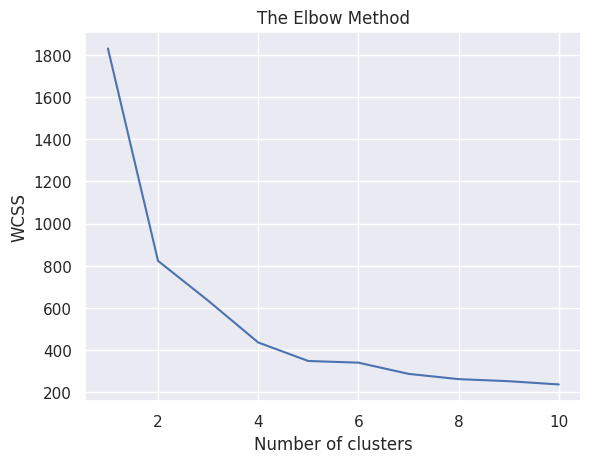

In [ ]:
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
clf = KMeans(n_clusters=5)
clf.fit_predict(norm_data)
clf

KMeans(n_clusters=5)

In [ ]:
clf.labels_

array([2, 2, 2, ..., 3, 4, 4], dtype=int32)

In [ ]:
clf.inertia_ #Inertia measures how well a dataset was clustered by K-Means.->WCSS distances for k=6

348.93474964504145

In [ ]:
clf.cluster_centers_

array([[ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.21964677e-15],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01, -5.32907052e-15],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 1.94320126e-02,  8.45201690e-03,  1.77012609e-02,
         8.24442289e-03,  1.69738118e-03,  1.23164659e-02,
  

In [ ]:
clf.labels_
#.lables_ or .names_ gives info to which cluster it is belonging to

array([2, 2, 2, ..., 3, 4, 4], dtype=int32)

In [ ]:
md=pd.DataFrame(clf.labels_,columns=['cluster'])
md

,cluster
0,2
1,2
2,2
3,2
4,3
...,...
3993,1
3994,1
3995,3
3996,4


In [ ]:
norm_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0


In [ ]:
norm_data['cluster_id'] = clf.labels_

In [ ]:
norm_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
ID,,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,2
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,2
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,2
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,2
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,1
4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,1
4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,3


In [ ]:
clust_id =norm_data.iloc[:,:].groupby(norm_data.cluster_id).mean()
clust_id

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
cluster_id,,,,,,,,,,,,
0,0.069389,0.006590,0.646036,0.000809,0.005663,0.119022,0.200384,0.007272,0.011846,0.532620,0.0,0.0
1,0.048995,0.026054,0.039004,0.016345,0.002229,0.033564,0.121825,0.033427,0.059407,0.522892,1.0,1.0
2,0.029282,0.008065,0.030530,0.009793,0.000288,0.013149,0.080391,0.007912,0.013738,0.671079,0.0,2.0
3,0.063535,0.017791,0.728960,0.000619,0.006498,0.172970,0.234904,0.023160,0.040421,0.586139,1.0,3.0
4,0.019432,0.008452,0.017701,0.008244,0.001697,0.012316,0.071854,0.006914,0.011401,0.240027,0.0,4.0


In [ ]:
norm_data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award', 'cluster_id'],
      dtype='object')

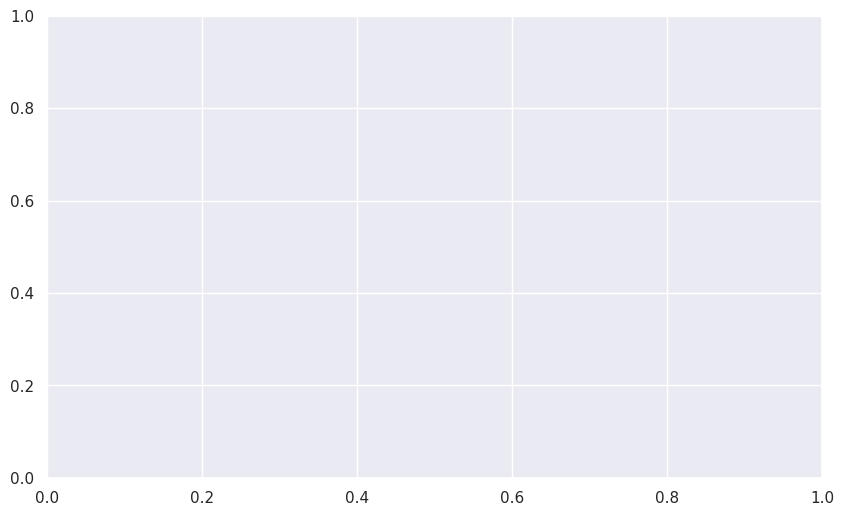

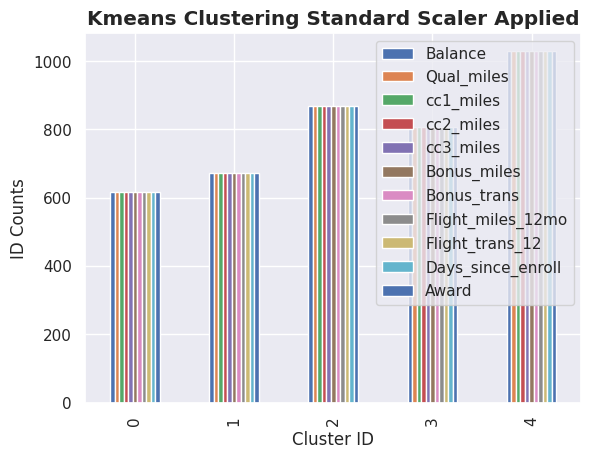

In [ ]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
norm_data.groupby(['cluster_id']).count().plot(kind='bar')
plt.xlabel('Cluster ID')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
plt.show()

###  Data Preprocessing

1.**Standardizing the Data**

In [ ]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3998, 11)

 2.** Normalizing the data**

In [ ]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3998, 11)

### **Silhouette Score**
Silhouette coefficient

The silhouette analysis measures how well an observation is clustered and it estimates the average distance between clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.
For each observation i, the silhouette width si is calculated as follows:

For each observation i, calculate the average dissimilarity ai between i and all other points of the cluster to which i belongs.
For all other clusters C, to which i does not belong, calculate the average dissimilarity d(i,C) of i to all observations of C. The smallest of these d(i,C) is defined as bi=minCd(i,C). The value of bi can be seen as the dissimilarity between i and its “neighbor” cluster, i.e., the nearest one to which it does not belong.

Finally the silhouette width of the observation i is defined by the formula: Si=(bi−ai)/max(ai,bi).
Silhouette width can be interpreted as follow:
Observations with a large Si (almost 1) are very well clustered.
A small Si (around 0) means that the observation lies between two clusters.
Observations with a negative Si are probably placed in the wrong cluster.

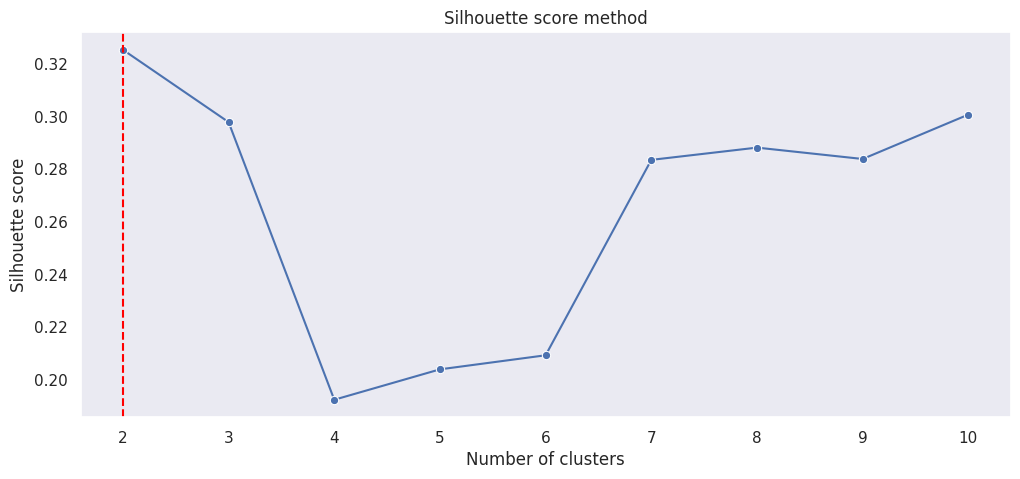

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming std_df is your standardized dataframe
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # number of clusters
clusters_inertia = []  # inertia of clusters
s_scores = []  # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg)  # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()


# DBSCAN Clustering Algorithm

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular unsupervised machine learning algorithm for clustering data points. It groups data points into distinct clusters based on their density and proximity to each other. DBSCAN is capable of handling noise and outliers, and is particularly useful when dealing with datasets containing scattered, irregularly shaped clusters.

The algorithm requires two primary parameters: **epsilon (ε)** for measuring distance and **MinPts** for minimum number of points required to form a dense region. It's widely used in clustering, anomaly detection, and data mining applications.  

There are three types of points after the DBSCAN clustering is complete:

**Core** — This is a point that has at least m points within distance n from itself.

**Border** — This is a point that has at least one Core point at a distance n.

**Noise** — This is a point that is neither a Core nor a Border.

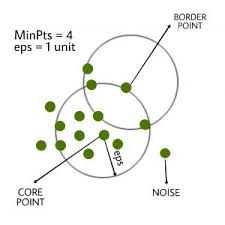

DBSCAN can discover clusters of arbitrary shapes, whereas K-Means assumes that the clusters are spherical.


 ![alt text](https://media.geeksforgeeks.org/wp-content/uploads/PicsArt_11-17-08.07.10-300x300.jpg)

In [ ]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [ ]:
array= data.values

In [ ]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

The code uses StandardScaler to standardize the input data by removing the mean and scaling to unit variance. The fit method calculates the mean and standard deviation for each feature, while the transform method applies this standardization. The result is a transformed dataset where each feature has a mean of 0 and a standard deviation of 1.

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [ ]:
X

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [ ]:
dbscan = DBSCAN(eps=1.8, min_samples=10) # take eps & min_samples values randomly
dbscan.fit(X)

DBSCAN(eps=1.8, min_samples=10)

In [ ]:
label =dbscan.labels_
label

array([0, 0, 0, ..., 1, 0, 0])

Noisy samples are given the label -1.

.lables_ or .fit_predict(data) gives info to which cluster it is belonging to

In [ ]:
pd.Series(label).unique()
c1

array([ 0,  1, -1,  2])

In [ ]:
c1 = pd.DataFrame(dbscan.labels_, columns=['cluster'])
c1

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3993,1
3994,1
3995,1
3996,0


In [ ]:
data.shape

(3998, 11)

In [ ]:
pd.concat([data,c1],axis=1) #combine to 2 dataframes

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0.0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,0.0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,1.0
5,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


<Axes: xlabel='Balance', ylabel='Bonus_trans'>

<Figure size 800x600 with 0 Axes>

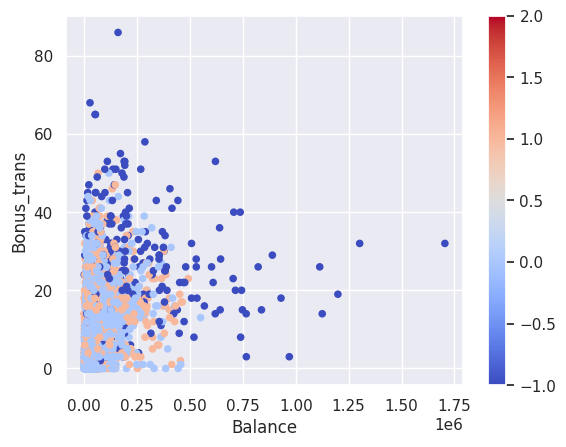

In [ ]:
plt.figure(figsize=(8,6))
data.plot(x="Balance",y="Bonus_trans",c=dbscan.labels_,kind="scatter",cmap="coolwarm")

In [ ]:
import sklearn
sklearn.metrics.silhouette_score(X,dbscan.labels_)
#silhouette_score near to 1 -> best
#silhouette_score near to 0 -> overfitting data
#silhouette_score near to -1 -> worst

0.25251409797009516

In [ ]:
from sklearn.neighbors import NearestNeighbors # for K-distance graph

In [ ]:
neigh= NearestNeighbors(n_neighbors=12) #2n -> n=# of fetaure/column =6 ,2n=2*6=>12
nbrs=neigh.fit(X)
distances,indices=nbrs.kneighbors(X)

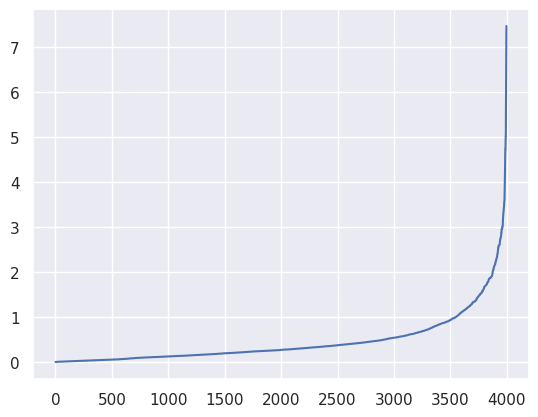

In [ ]:
distances=np.sort(distances,axis=0)
distances=distances[:,]
plt.plot(distances)

In [ ]:
indices

array([[   0,  378,  363, ...,   54,  361,  299],
       [   1,    3,  363, ...,    5,   14,   51],
       [   2,  338,  368, ...,  513,   83,    1],
       ...,
       [3995, 3876, 3800, ..., 3375, 3263, 3129],
       [3996, 3623, 3881, ..., 3616, 3242, 3216],
       [3997, 3491, 3455, ..., 3909, 3395, 3370]])